# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?

4. How do ***log likelihoods*** and ***posteriors*** differ from each other as a result of ***improper priors*** and ***marginal likelihood constants***?


# 1.

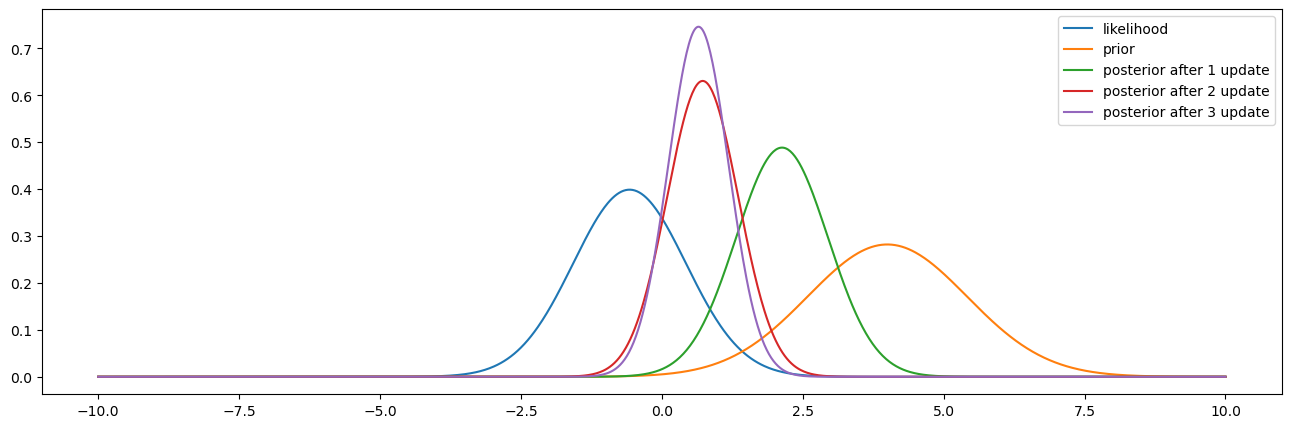

In [19]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
n=3
x = stats.norm(loc=0,scale=1).rvs(1)
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1).prod(axis=0) 
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, likelihood, label="likelihood")
plt.plot(parameter_domain, prior, label="prior")
for i in range(n):
    x = stats.norm(loc=0,scale=1).rvs(1)
    theta_0=(tau*theta_0+x)/(tau+1)
    tau=tau+1
    posterior = stats.norm(loc=theta_0, scale=1/(tau)**0.5).pdf(parameter_domain)
    plt.plot(parameter_domain,posterior,label="posterior after "+ str(i+1) +" update")

plt.legend()
    
    


## 2. 

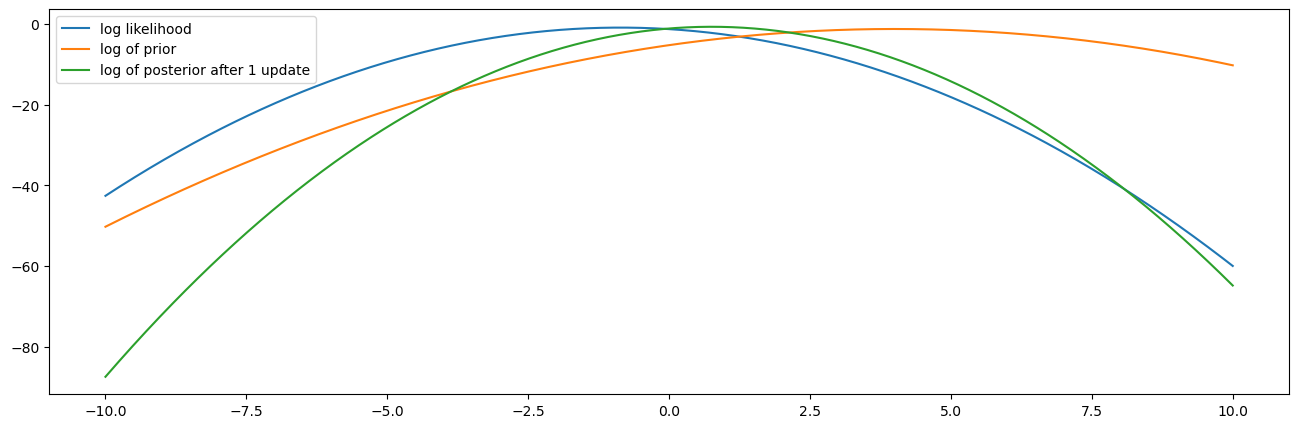

In [22]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
n=1
x = stats.norm(loc=0,scale=1).rvs(1)
likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1).prod(axis=0) 
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, likelihood, label="log likelihood")
plt.plot(parameter_domain, prior, label="log of prior")
theta_0=(tau*theta_0+x)/(tau+1)
tau=tau+1
posterior = stats.norm(loc=theta_0, scale=1/(tau)**0.5).logpdf(parameter_domain)
plt.plot(parameter_domain,posterior,label="log of posterior after "+ str(i+1) +" update")

plt.legend()

    


## 3. 

If the likelihood satisfy $p(\theta) \propto 1$, the posterior will be identical to distribution given the observations. As $p(\theta) \propto 1$, the range of the normal distribution is infinitely large, implying that the precision of the original distribution is almost as small as 0 ($\tau=0$). 

Therefore, the updated precision will be $ \tau+n\phi=n\phi$, and the updated mean will be  $ \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)^2   = \frac{1}{n }\left(\sum _{i=1}^{n}x_{i}\right)^2   = \frac{\sum _{i=1}^{n}x_{i}}{n}   $


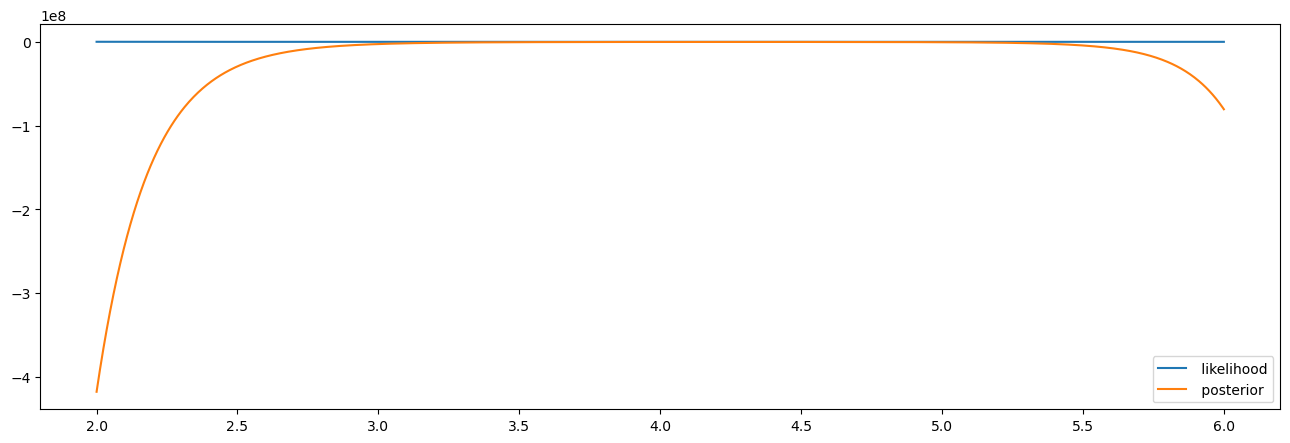

In [204]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

theta_0,tau = 4,0.00001; parameter_domain = np.linspace(2,6,1001); 
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
np.random.seed(365)  
x = stats.norm(loc=4,scale=1).rvs(10)
likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1).prod(axis=0) 
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, likelihood, label=" likelihood")
#plt.plot(parameter_domain, prior, label=" prior")

posterior = likelihood*prior
plt.plot(parameter_domain,800*posterior,label=" posterior")

plt.legend()


## 4. 

1. As $ \phi_p= n\phi$, and  $ \theta_p = \frac{\sum _{i=1}^{n}x_{i}}{{n}}   $, posterior distribution will be similar to likelihood, and their log plots connect on the same point on x-axis, but with different slope
2. The times of difference of the two log plots is the marginal likelihood constant. 